prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy
from astropy.constants import G

from IPython.display import Latex

pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)

\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

# DELIVERABLE 1

orbital speed

$v = \frac{2\pi r}{t} $

orbita acceleration

$a = dv/dt = \frac{v^2}{r}$

Gravitational force

$F~=~\frac{GMm}{r^2}$

$F~=~ma~=~m\frac{v^2}{r}~=~\frac{GMm}{r^2}$

normally the central mass is identified with M, while the test particle put in the potential is identified with m. In this case I will switch notation to be consistent with the paper. m is then the mass of the galaxy which, when treated as concentrated at the center of the galaxy, is the mass generating the potential.
$M\frac{v^2}{r}~=~\frac{GMm}{r^2}$

cancel r and m


$v^2~=~\frac{Gm}{r}$

m, the mass generating the potential, is a function of r since a galaxy has a mass distribution that varies with the radius


## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
# deleate 
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv", 
                  skiprows=2, names=["r",'v','dv','err'])

In [3]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [4]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

# DELIVERABLE 2

In [5]:
#delete 
apparentSizeM31 = 3.167 / 2 #deg
distanceM31 = (778, 33) # kpc 


# DELIVERABLE 3

In [6]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Radius of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Radius of the visible component of Andromeda: 0.03 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [7]:
#delete
m31Dist = distanceM31[0] * u.kpc
m31DistErr = distanceM31[1] * u.kpc

# DELIVERABLE 4 

In [8]:
#delete
m31Size = m31Dist * m31angS.to(u.rad)  
m31SizeError = m31DistErr * m31angS.to(u.rad) 
print("Size of the visible component of Andromeda: " + 
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError  ))#, m31SizeError
rerr = 0.9

Size of the visible component of Andromeda: 22 kpc rad +/- 0.9 kpc rad


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

# DELIVERABLE 5

In [9]:
print("First measurement outside of the visible radius:")
round(m31[m31.r > m31Size].r.values[0], 2) * u.kpc

First measurement outside of the visible radius:


<Quantity 23.74 kpc>

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

# DELIVERABLE 5

In [10]:
#delete
# first measurement including all mass
def getradii(gal, gsize, n):
    ''' doc string...'''
    
    i = gal[gal.r > n * gsize].r.index[0]
    # first measurement twice as far
    r = gal.iloc[i:i+1]
    return r
  
m31Rds = (getradii(m31, m31Size, 1),  
          getradii(m31, m31Size, 2),  
          getradii(m31, m31Size, 3))
print(m31Rds[0]), print(m31Rds[1]), print(m31Rds[2]);

         r        v      dv   err
30  23.738  236.511  11.729  1.58
         r        v       dv     err
34  49.222  237.069  109.381  23.924
        r        v       dv     err
36  70.88  218.489  132.355  24.657


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

# DELIVERABLE 7

/Users/fbb/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


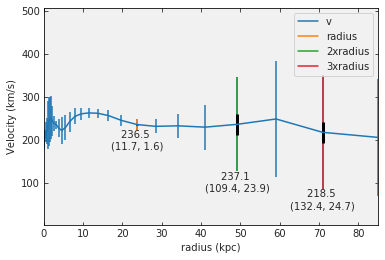

In [11]:
#delete leave plot
def plotGal(gal, rds):
    ax = gal.plot(x='r', y='v', yerr='dv')
    ax = rds[0].plot(x='r', y='v', yerr='dv', ax=ax, 
                                 label="radius")
    ax = rds[1].plot(x='r', y='v', yerr='dv', ax=ax, 
                                  label="2xradius")
    ax = rds[2].plot(x='r', y='v', yerr='dv', ax=ax, 
                                  label="3xradius")
    ax = rds[0].plot(x='r', y='v', yerr='err', ax=ax, 
                                  lw=3, c="k", legend=False)
    ax = rds[1].plot(x='r', y='v', yerr='err', ax=ax, 
                                  lw=3, c="k", legend=False)
    ax = rds[2].plot(x='r', y='v', yerr='err', ax=ax, 
                                   lw=3, c="k", legend=False)
    ax.set_ylabel("Velocity (km/s)")
    ax.set_xlabel("radius (kpc)")
    ax.text(rds[0].r, rds[0].v - rds[0].dv, 
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[0][["v", "dv", "err"]].values[0]), ha="center", va="top")
    ax.text(rds[1].r, rds[1].v - rds[1].dv, 
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[1][["v", "dv", "err"]].values[0]), ha="center", va="top")
    ax.text(rds[2].r, rds[2].v - rds[2].dv, 
            "{:.1f} \n({:.1f}, {:.1f})".format(
                *rds[2][["v", "dv", "err"]].values[0]), ha="center", va="top")
    ax.set_xlim(0, rds[2].r.values[0] * 1.2);
plotGal(m31, m31Rds)
#m31, m31Rds

##### Figure 1: the rotational speed of the Andromeda galaxy, as measured from H regions in [Sofue 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf). The velocity, and the standard error (SD) as its uncertainty, is indicated at the location of each measurement from the center of the galaxy. The location where a measurement is avalable outside but as close as possible to the limit of the visible component of Anstromeda, the nominal Andromeda radius, is shown in orange.  Locations at least twice as far and 3 times as far are shown in green and red respectively. For those three location the standard error (SE), typically larger than the SD, is also shown (black) .

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

# DELIVERABLe 8

In [34]:
errdic = {'dv': "SD",
    "err": "SE"}
#delete
def vratios(gal, rds, rd, err='dv'):
    """ calculates the significance of the difference between the measured and expected velocity ratios:
    Parameters:
    gal: a dataframe containing the measuremets for a galax: should contain features: r	v	dv	err as columns
    rds: the visible radius of the galaxy in the same units as r in gal
    rd: the number of radii away from the center of the galaxy where to compare the measurements 
            (measurements are always compared to radius=1)
    err: whether to use SD or SW as error. Default: SD
    
    Output: 
    prints statements about significance and plots the measurements and their uncertainties for comparison
    """
    print("\n\n using {} as uncertainty".format(errdic[err]))
    rin, rout = rds[0], rds[rd - 1] # the index of the radius array starts with 0: 0 = 1 radius, 1 = 2 radii etc
    
    offset = {"dv": 0, "err":0.05}
    #ratio of v
    vratio = rin["v"].values[0] / rout["v"].values[0]
    
    #uncertainty in reatio of v
    dv =  vratio * np.sqrt(
        (rin[err].values[0] /
            rin["v"].values[0])**2 + 
        (rin[err].values[0] /
            rin["v"].values[0])**2)

    expratiosq = rout.r.values[0] / rin.r.values[0]
    expratio = np.sqrt(expratiosq)
    
    expratiosq_error = expratiosq * np.sqrt(
    (rout.r.values[0]/
            rerr)**2 + 
        (rin.r.values[0]/
            rerr)**2) 
    
    expratio_error = 0.5 * (expratiosq_error)**(0.5-1) 

    print("expected ratio of velocities {:.2f} +/- {:.2f}".format(expratio, expratio_error))
    print(r"ratio of velocities {:.2f} +/- {:.2f}".format(
          vratio, dv))
    
    for sigma in [2,3]:
        print ("confidence level {}-sigma".format(sigma))
    
    
        ubound = vratio + dv * sigma
        lbound = vratio - dv * sigma
        print ("\t expected range {}-{}".format(round(expratio - expratio_error * sigma, 2), 
                                                round(expratio + expratio_error * sigma, 2)))
        print("\t measurement upper bound ({}-sigma) {:.2f}".format(sigma,
          ubound))
        print("\t measurement lower bound ({}-sigma) {:.2f}".format(sigma,
          max(0, lbound)))
        print("\t ratios are the same at {}-sigma significance: {}".format(
            sigma, (round(ubound, 2) >= round(expratio - expratio_error * sigma, 2)) and 
                   (round(lbound, 2) <= round(expratio + expratio_error * sigma, 2))))
        pl.errorbar(sigma - offset['err'] / 2 + offset[err], expratio, 
                    yerr=expratio_error * sigma, color='r')
        
        pl.errorbar(sigma - offset['err'] / 2 + offset[err], vratio, 
                    yerr=dv * sigma, color='b', alpha=0.8)
        pl.text(sigma - offset['err'] / 2 + offset[err],  0.5 * (pl.ylim()[0] + pl.ylim()[1]), 
                errdic[err], 
                color="k", va="center", ha="center", rotation=90)
    
    pl.text(2.5, vratio, "measured", color="b", va="center", ha="center")
    pl.text(2.5, expratio, "expected", color="r", va="center", ha="center")
    pl.yticks([vratio, expratio]) 
    pl.ylabel("velocity ratio")
    pl.xticks([2, 3]) 
    pl.xlabel("significance threshold (sigmas)")
    #print(vratio + 3*dv, G / kpc2m / r1 / (G / kpc2m / r2))

Andromeda, comparing measurements at 1 and 2 radii from the center


 using SD as uncertainty
expected ratio of velocities 1.44 +/- 0.04
ratio of velocities 1.00 +/- 0.07
confidence level 2-sigma
	 expected range 1.35-1.53
	 measurement upper bound (2-sigma) 1.14
	 measurement lower bound (2-sigma) 0.86
	 ratios are the same at 2-sigma significance: False
confidence level 3-sigma
	 expected range 1.31-1.57
	 measurement upper bound (3-sigma) 1.21
	 measurement lower bound (3-sigma) 0.79
	 ratios are the same at 3-sigma significance: False


 using SE as uncertainty
expected ratio of velocities 1.44 +/- 0.04
ratio of velocities 1.00 +/- 0.01
confidence level 2-sigma
	 expected range 1.35-1.53
	 measurement upper bound (2-sigma) 1.02
	 measurement lower bound (2-sigma) 0.98
	 ratios are the same at 2-sigma significance: False
confidence level 3-sigma
	 expected range 1.31-1.57
	 measurement upper bound (3-sigma) 1.03
	 measurement lower bound (3-sigma) 0.97
	 ratios are the same at 3-sig

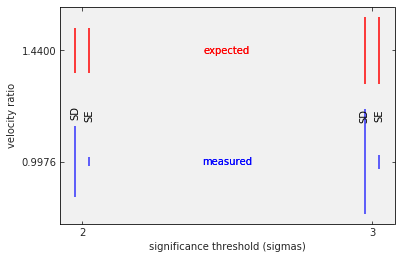

In [35]:
print("Andromeda, comparing measurements at 1 and 2 radii from the center")
vratios(m31, m31Rds, 2)
vratios(m31, m31Rds, 2, err='err')

# not mandatory plot

##### Figure 2: diagnostic plot: the expected  and measured velocity ratios for Andromeda and their uncertainties when using SD and SE as uncertainties in the velocity measurements (and propagating the uncertainty in the distance to represent the minimum uncertainty in the location of the measurement) - if the expected and measured velocity ratios were consistent, the errorbars would overlap

Andromeda, comparing measurements at 1 and 3 radii from the center


 using SD as uncertainty
expected ratio of velocities 1.73 +/- 0.03
ratio of velocities 1.08 +/- 0.08
confidence level 2-sigma
	 expected range 1.66-1.79
	 measurement upper bound (2-sigma) 1.23
	 measurement lower bound (2-sigma) 0.93
	 ratios are the same at 2-sigma significance: False
confidence level 3-sigma
	 expected range 1.63-1.82
	 measurement upper bound (3-sigma) 1.31
	 measurement lower bound (3-sigma) 0.85
	 ratios are the same at 3-sigma significance: False


 using SE as uncertainty
expected ratio of velocities 1.73 +/- 0.03
ratio of velocities 1.08 +/- 0.01
confidence level 2-sigma
	 expected range 1.66-1.79
	 measurement upper bound (2-sigma) 1.10
	 measurement lower bound (2-sigma) 1.06
	 ratios are the same at 2-sigma significance: False
confidence level 3-sigma
	 expected range 1.63-1.82
	 measurement upper bound (3-sigma) 1.11
	 measurement lower bound (3-sigma) 1.05
	 ratios are the same at 3-sig

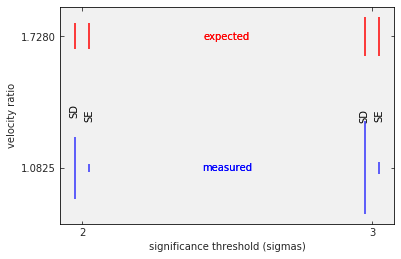

In [36]:
print("Andromeda, comparing measurements at 1 and 3 radii from the center")
vratios(m31, m31Rds, 3)
vratios(m31, m31Rds, 3, err='err')

##### Figure 3: Same as figure 2 for measurements at 3 radii instead of 2.

### Discuss!
# FEEDBACK Student's consideration should include the fact that for Andromeda the measured velocity ratios are inconsistent with the prediction from Newtonian gravity, even when including the uncertainties. However, the uncertainties reported in the paper have very different magnitude. 

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

# SAME DELIVERABLES (grade this half 20% altogether)

In [37]:
#delete all below

In [38]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv", 
                 skiprows=2, names=["r",'v','dv','err'])
mw.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [39]:
mw.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249062,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


https://en.wikipedia.org/wiki/Milky_Way
    

In [40]:
mwSize =  53.65 / 2 * u.kpc # visible component 150,000-200,000 ly = 46.0-61.3 kpc, mid opint 53.65, 
mwSizeError = 7.65 * u.kpc #uncertainty : (61.3-46.0)/2 kpc = 7.65 kpc
print(mwSize, "+/-", mwSizeError)#, m31SizeError

26.825 kpc +/- 7.65 kpc


In [41]:
mwRds = (getradii(mw, mwSize, 1), getradii(mw, mwSize, 2), getradii(mw, mwSize, 3))
print(mwRds[0]), print(mwRds[1]), print(mwRds[2]);

         r        v      dv     err
44  30.477  240.165  74.879  20.538
         r        v      dv     err
48  63.198  177.979  47.004  16.345
         r        v      dv     err
50  91.005  179.697  62.587  20.907


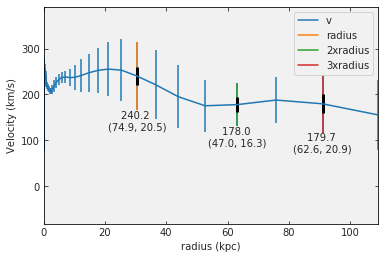

In [42]:
plotGal(mw, mwRds)

##### Figure 4: Same as figure 1 but for the Milky Way. The Milky Way radius is estimated from estimated of its visible component (Wikipedia reports 150,000-200,000 light years).

MW, comparing measurements at 1 and 2 radii from the center


 using SD as uncertainty
expected ratio of velocities 1.44 +/- 0.04
ratio of velocities 1.35 +/- 0.59
confidence level 2-sigma
	 expected range 1.36-1.52
	 measurement upper bound (2-sigma) 2.54
	 measurement lower bound (2-sigma) 0.16
	 ratios are the same at 2-sigma significance: True
confidence level 3-sigma
	 expected range 1.32-1.56
	 measurement upper bound (3-sigma) 3.13
	 measurement lower bound (3-sigma) 0.00
	 ratios are the same at 3-sigma significance: True



 using SE as uncertainty
expected ratio of velocities 1.44 +/- 0.04
ratio of velocities 1.35 +/- 0.16
confidence level 2-sigma
	 expected range 1.36-1.52
	 measurement upper bound (2-sigma) 1.68
	 measurement lower bound (2-sigma) 1.02
	 ratios are the same at 2-sigma significance: True
confidence level 3-sigma
	 expected range 1.32-1.56
	 measurement upper bound (3-sigma) 1.84
	 measurement lower bound (3-sigma) 0.86
	 ratios are the same at 3-sigma signif

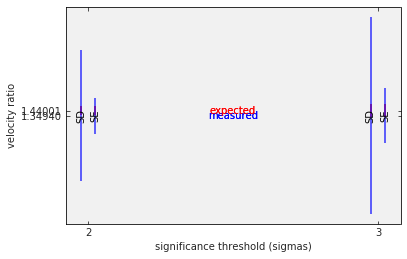

MW, comparing measurements at 1 and 3 radii from the center


 using SD as uncertainty
expected ratio of velocities 1.73 +/- 0.03
ratio of velocities 1.34 +/- 0.59
confidence level 2-sigma
	 expected range 1.67-1.78
	 measurement upper bound (2-sigma) 2.52
	 measurement lower bound (2-sigma) 0.16
	 ratios are the same at 2-sigma significance: True
confidence level 3-sigma
	 expected range 1.64-1.81
	 measurement upper bound (3-sigma) 3.10
	 measurement lower bound (3-sigma) 0.00
	 ratios are the same at 3-sigma significance: True



 using SE as uncertainty
expected ratio of velocities 1.73 +/- 0.03
ratio of velocities 1.34 +/- 0.16
confidence level 2-sigma
	 expected range 1.67-1.78
	 measurement upper bound (2-sigma) 1.66
	 measurement lower bound (2-sigma) 1.01
	 ratios are the same at 2-sigma significance: False
confidence level 3-sigma
	 expected range 1.64-1.81
	 measurement upper bound (3-sigma) 1.82
	 measurement lower bound (3-sigma) 0.85
	 ratios are the same at 3-sigma signi

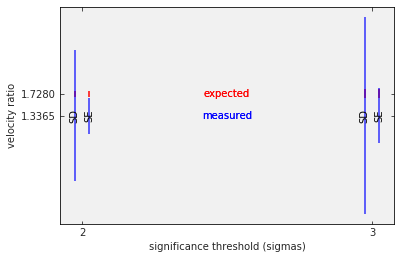

In [44]:
print("MW, comparing measurements at 1 and 2 radii from the center")
vratios(mw, mwRds, 2)
print ()
vratios(mw, mwRds, 2, "err")
print ()
pl.show()
print("MW, comparing measurements at 1 and 3 radii from the center")
vratios(mw, mwRds, 3)
print()
vratios(mw, mwRds, 3, "err")

# FEEDBACK Students should notice that for the MW the uncertainties overlat! this is true for all cases when comparing the measurements at 2 radii, and true when compating the measurements at 3 adii with the confidence level is 2 sigma and standard deviation is used. If they used 2-sigma then it is true in all cases